## IMPORTATION DES LIBRARY

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## DATA PREPROCESSING

In [4]:
data = pd.read_csv("dataset_capteur_2023.csv")

In [5]:
data

,Unnamed: 0,Date,Feedwater_Pressure_bar_PFW,Feedwater_Flow_m3/h_QFW,Feedwater_Temperature_°C_TFW,Feedwater_Level_%_LFW,Saturated_steam_Pressure_bar_Pss,Saturated_steam_Flow_t/h_Qss,Saturated_steam_Temperature_°C_Tss,Gas_SO2__Temperature_°C_TBI,...,Seawater_Flow_m3/h_QSW,Seawater_Pressure_bar_PSW,Seawater_Temperature_°C_TCI,Seawater_Temperature_°C_TCO,Seawater_Pressure_Drops_mmH2O_ΔPSW,Seawater_Level_%_LSW,Electricity_Voltage_kV_U,Electricity_frequency_Hz_f,Electricity_Power_Factor_Per_unit_cosφ,Electricity_Puissance_MW_P
0,3,2023-01-01 00:01:00,93.280174,266.083466,109.060066,79.949287,61.148067,246.954590,277.902740,413.576019,...,1441.481782,2.114651,18.588535,32.563625,184.491364,87.960564,10.05516,50.039071,0.821597,34.043452
1,4,2023-01-01 00:02:00,93.468819,261.887512,109.105957,79.908928,61.092888,246.657730,277.837067,413.640228,...,1441.693894,2.096359,18.596817,32.798855,184.238815,85.349754,10.05523,50.003178,0.826111,34.183190
2,5,2023-01-01 00:02:59.990000,93.338997,263.683990,109.109222,79.898460,61.079357,248.463669,277.845520,413.634430,...,1441.147754,2.089440,18.748205,32.658054,184.439331,83.278664,10.05530,50.032780,0.818647,33.961384
3,6,2023-01-01 00:03:59.985000,93.241493,265.576630,109.056213,79.820618,61.120720,247.978088,277.861145,413.597656,...,1441.211849,2.085729,18.741425,32.778538,183.912933,82.045219,10.05537,50.033333,0.819867,34.097783
4,7,2023-01-01 00:04:59.980000,93.398056,261.897186,108.977745,80.006149,61.062420,246.359314,277.782227,413.714325,...,1441.565657,2.077364,18.675907,32.642910,184.275467,81.590858,10.05544,50.000000,0.821050,34.124147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436628,437794,2023-10-31 23:55:31.020000,96.174507,228.564285,108.951889,79.856422,60.878906,246.108521,277.626892,414.119293,...,6733.780273,2.097382,18.698435,31.769054,184.925003,87.311722,10.06111,50.033333,0.860358,32.831337
436629,437795,2023-10-31 23:56:31.015000,92.626991,273.101166,109.092186,80.038231,61.112518,246.953094,277.900391,414.319366,...,6254.978027,2.098082,18.738089,31.957415,183.668488,88.488197,10.06118,50.064237,0.860805,33.060410
436630,437796,2023-10-31 23:57:31,92.416466,273.559021,108.980362,79.865334,61.429005,247.648315,278.246552,414.536926,...,6112.659180,2.102995,18.479069,31.964947,185.014404,88.304199,10.06125,50.064237,0.870049,33.519736
436631,437797,2023-10-31 23:58:31.005000,93.986198,257.445099,108.901390,80.239845,61.418045,247.980606,278.250977,414.437439,...,6430.562500,2.106722,18.497669,31.743488,184.241562,87.142914,10.06132,50.033333,0.870228,33.172548


A titre informatif, les données ci-dessus représentent la production d'energy electrique de JFC-3 de **2023-01-01** to **2023-10-31**

Nous avons 33 features et 436633 rows

ci-dessous vous verrez comment cette energie est produite sur le site a travers le cycle de ranking

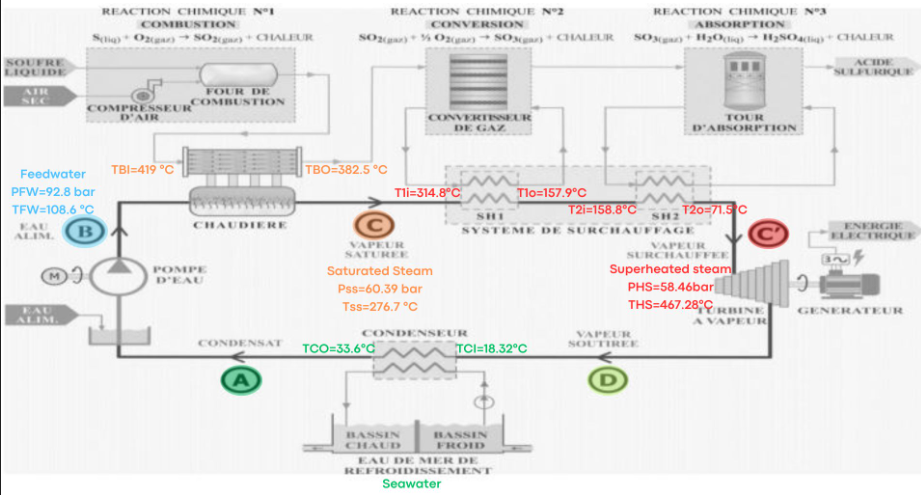

In [7]:
from PIL import Image
from IPython.display import display

# Chargez l'image
image = Image.open(r'C:\Users\user\Desktop\ProjetStage Datascience OCP Model & Dashbord Raymond\imageProduct.png')

# Affichez l'image
display(image)

pour une meilleur compréhension des data je proccède au changement des nom des colonnes en fonction des etape auxquelle ils appartiennent

Je proccède a la creation d'un pipeline de preprocessing en vue d'un traitement en continue des nouvelle dataset qui arriveront dans l'avenir

In [8]:
data_cleaned=data
data_cleaned.columns

Index(['Unnamed: 0', 'Date', 'Feedwater_Pressure_bar_PFW',
       'Feedwater_Flow_m3/h_QFW', 'Feedwater_Temperature_°C_TFW',
       'Feedwater_Level_%_LFW', 'Saturated_steam_Pressure_bar_Pss',
       'Saturated_steam_Flow_t/h_Qss', 'Saturated_steam_Temperature_°C_Tss',
       'Gas_SO2__Temperature_°C_TBI', 'Gas_SO2__Temperature_°C_TBO',
       'Gas_SO2__Pressure_Drops_mmH2O_ΔPSO2', 'Superheated_steam_Flow_t/h_QHS',
       'Superheated_steam_Pressure_bar_PHS',
       'Superheated_steam_Temperature_°C_THS',
       'Gas_SO3_Pressure_Drops_mmH2O_ΔPSH1',
       'Gas_SO3_Pressure_Drops_mmH2O_ΔPSH2', 'Gas_SO3_Temperature_°C_T1i',
       'Gas_SO3_Temperature_°C_T1o', 'Gas_SO3_Temperature_°C_T2i',
       'Gas_SO3_Temperature_°C_T2o', 'Turbine_Rotation_Speed_rpm_Ω',
       'Steam_Flow_t/h_QTO', 'Steam_Pressure_bar_PTO',
       'Steam_Temperature_°C_TTO', 'Seawater_Flow_m3/h_QSW',
       'Seawater_Pressure_bar_PSW', 'Seawater_Temperature_°C_TCI',
       'Seawater_Temperature_°C_TCO', 'Seawater_Pr

### Avant l'application du pipeline


<Figure size 2000x1500 with 0 Axes>

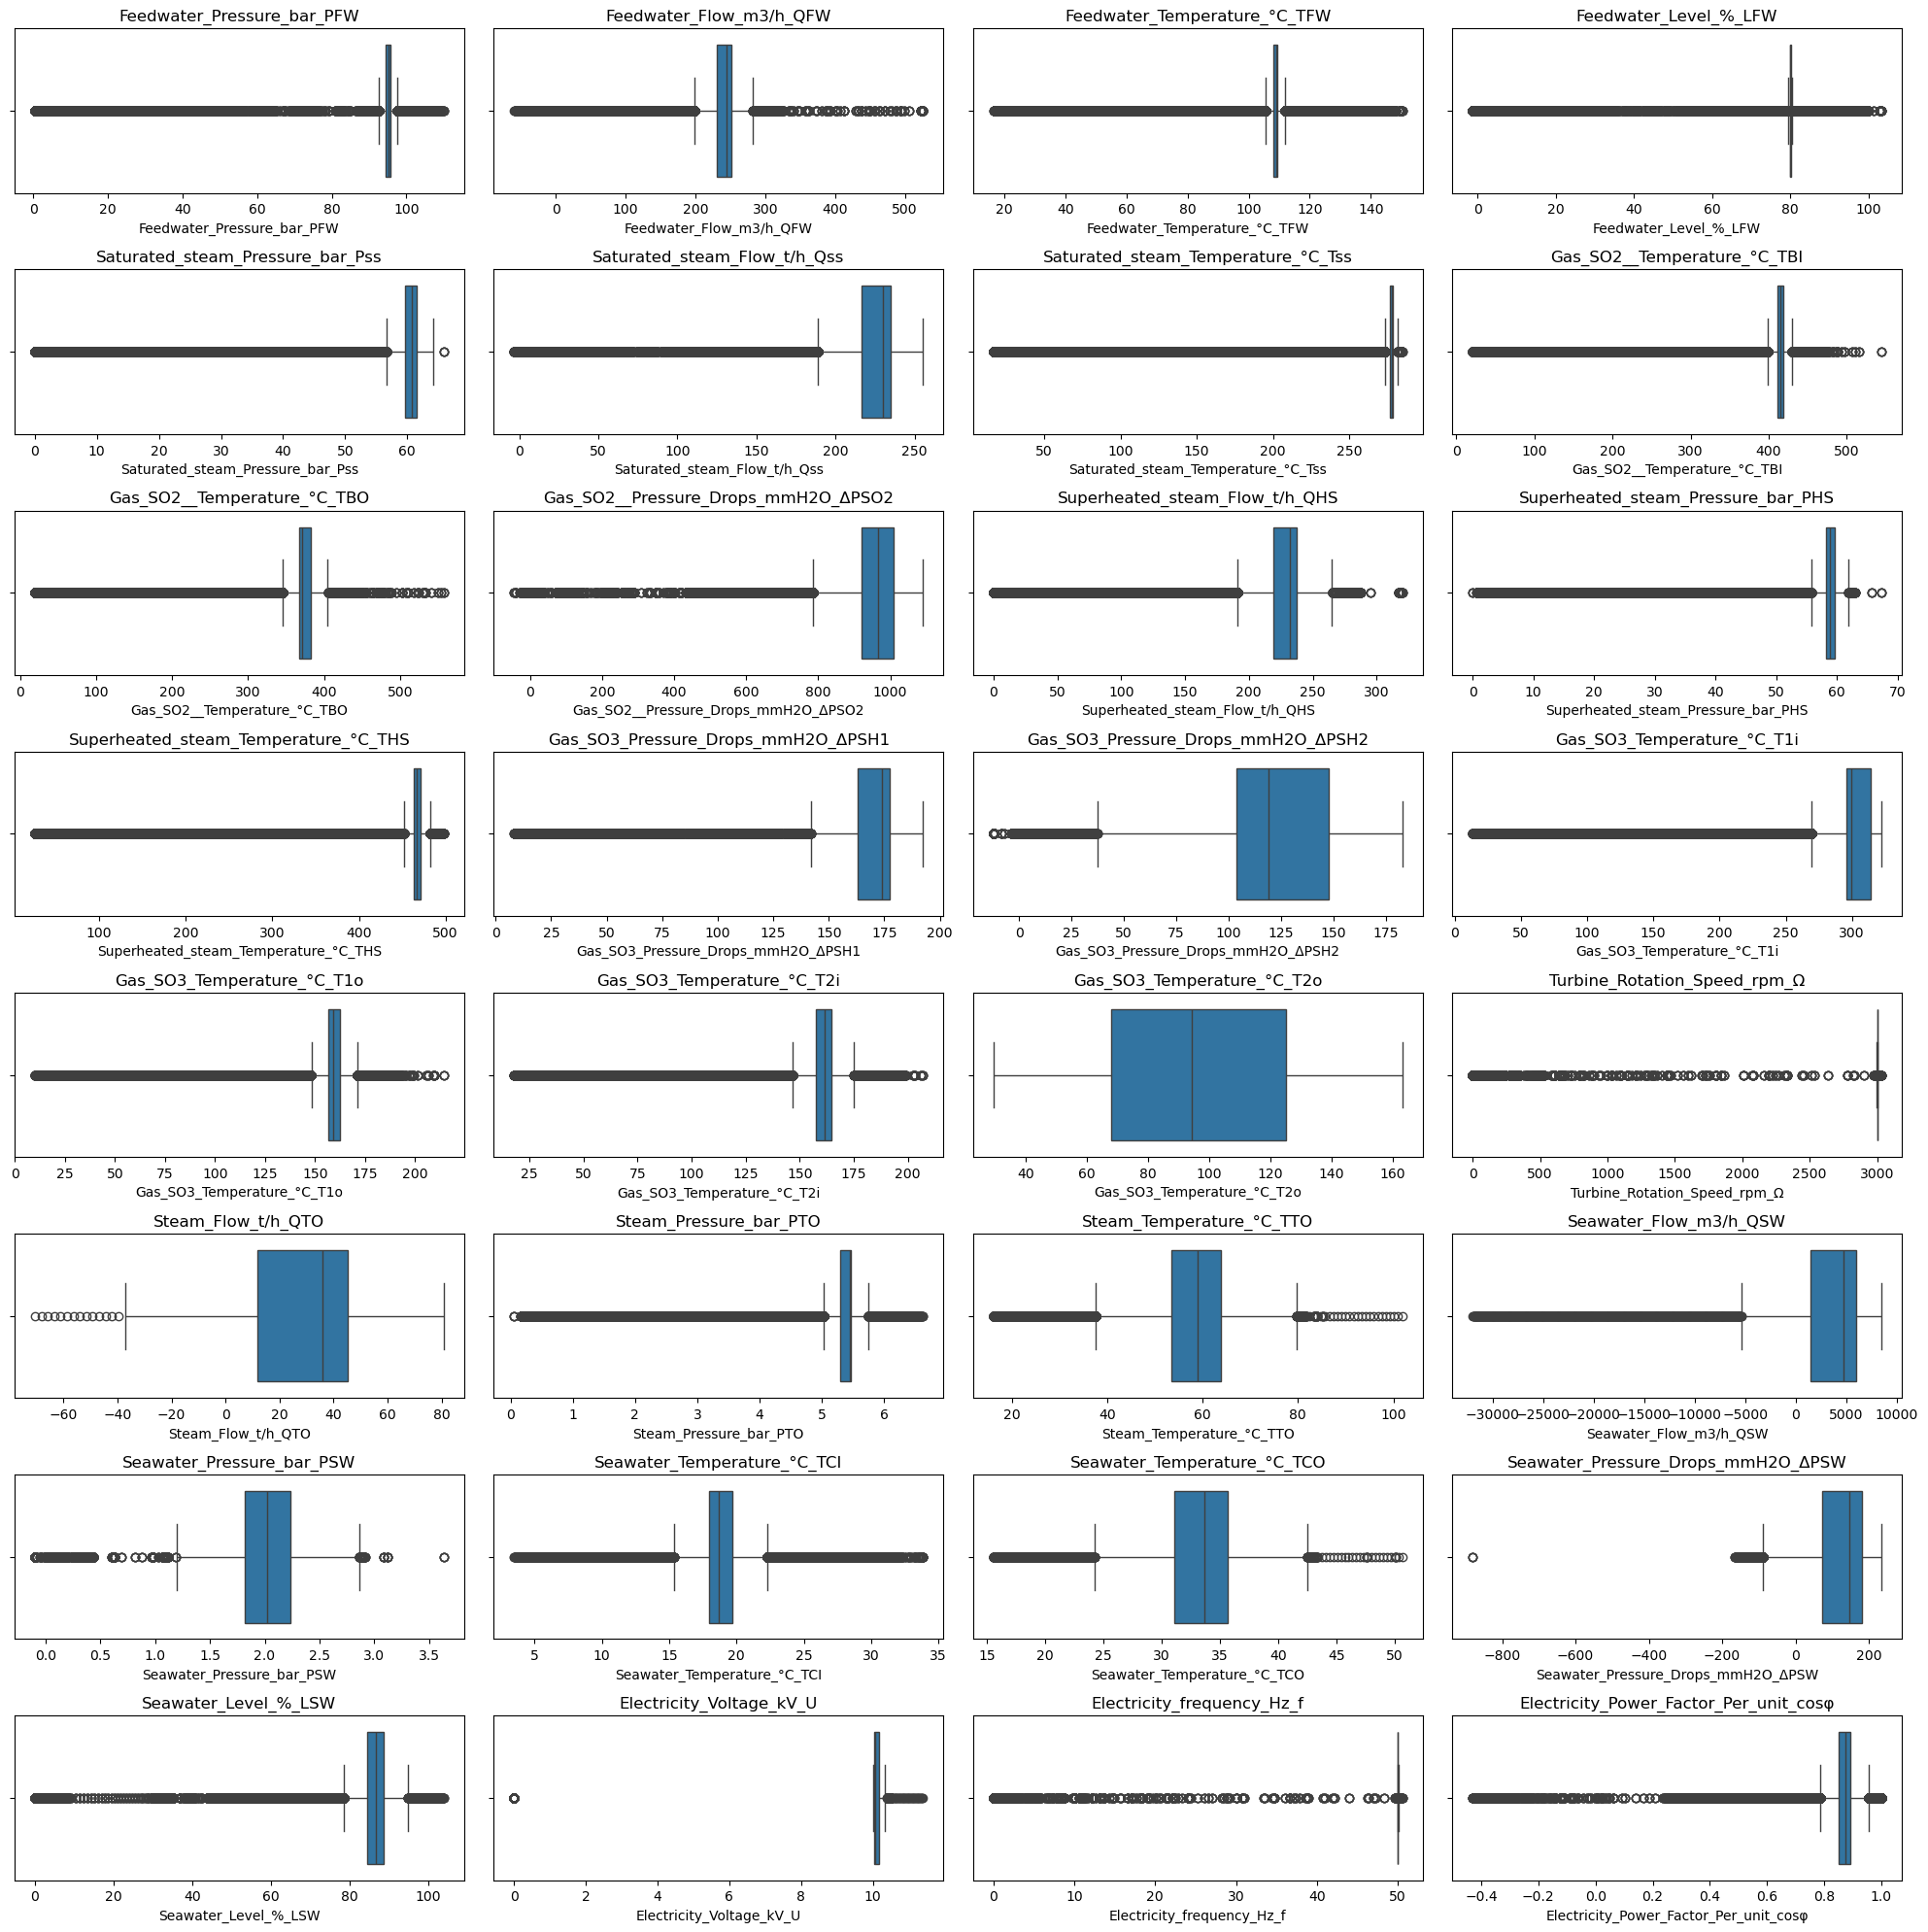

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des colonnes pour lesquelles créer des boxplots (excluant 'Date')
columns_to_plot = ['Feedwater_Pressure_bar_PFW',
       'Feedwater_Flow_m3/h_QFW', 'Feedwater_Temperature_°C_TFW',
       'Feedwater_Level_%_LFW', 'Saturated_steam_Pressure_bar_Pss',
       'Saturated_steam_Flow_t/h_Qss', 'Saturated_steam_Temperature_°C_Tss',
       'Gas_SO2__Temperature_°C_TBI', 'Gas_SO2__Temperature_°C_TBO',
       'Gas_SO2__Pressure_Drops_mmH2O_ΔPSO2', 'Superheated_steam_Flow_t/h_QHS',
       'Superheated_steam_Pressure_bar_PHS',
       'Superheated_steam_Temperature_°C_THS',
       'Gas_SO3_Pressure_Drops_mmH2O_ΔPSH1',
       'Gas_SO3_Pressure_Drops_mmH2O_ΔPSH2', 'Gas_SO3_Temperature_°C_T1i',
       'Gas_SO3_Temperature_°C_T1o', 'Gas_SO3_Temperature_°C_T2i',
       'Gas_SO3_Temperature_°C_T2o', 'Turbine_Rotation_Speed_rpm_Ω',
       'Steam_Flow_t/h_QTO', 'Steam_Pressure_bar_PTO',
       'Steam_Temperature_°C_TTO', 'Seawater_Flow_m3/h_QSW',
       'Seawater_Pressure_bar_PSW', 'Seawater_Temperature_°C_TCI',
       'Seawater_Temperature_°C_TCO', 'Seawater_Pressure_Drops_mmH2O_ΔPSW',
       'Seawater_Level_%_LSW', 'Electricity_Voltage_kV_U',
       'Electricity_frequency_Hz_f', 'Electricity_Power_Factor_Per_unit_cosφ',
       'Electricity_Puissance_MW_P']

# Créer une figure et une grille de subplots pour chaque boxplot
plt.figure(figsize=(20, 15))

# Créer une figure et une grille de 8x4 subplots
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(20, 20))

# Aplatir la liste des axes pour faciliter l'itération
axes = axes.flatten()

for i in range(len(axes)):
    col = columns_to_plot[i]
    sns.boxplot(x=data_cleaned[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


### Description de la data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

new_column_names = {
    'Feedwater_Pressure_bar_PFW': 'A_Pressure',
    'Feedwater_Flow_m3/h_QFW': 'A_Flow',
    'Feedwater_Temperature_°C_TFW': 'A_Temperature',
    'Feedwater_Level_%_LFW': 'A_Level',
    'Saturated_steam_Pressure_bar_Pss': 'B_Pressure',
    'Saturated_steam_Flow_t/h_Qss': 'B_Flow',
    'Saturated_steam_Temperature_°C_Tss': 'B_Temperature',
    'Gas_SO2__Temperature_°C_TBI': 'C_Temp_in',
    'Gas_SO2__Temperature_°C_TBO': 'C_Temp_out',
    'Gas_SO2__Pressure_Drops_mmH2O_ΔPSO2': 'C_Pressure_Drops',
    'Superheated_steam_Flow_t/h_QHS': 'D_Flow',
    'Superheated_steam_Pressure_bar_PHS': 'D_Pressure',
    'Superheated_steam_Temperature_°C_THS': 'D_Temperature',
    'Gas_SO3_Pressure_Drops_mmH2O_ΔPSH1': 'E_Pressure_Drops_1',
    'Gas_SO3_Pressure_Drops_mmH2O_ΔPSH2': 'E_Pressure_Drops_2',
    'Gas_SO3_Temperature_°C_T1i': 'E_Temp_in_1',
    'Gas_SO3_Temperature_°C_T1o': 'E_Temp_out_1',
    'Gas_SO3_Temperature_°C_T2i': 'E_Temp_in_2',
    'Gas_SO3_Temperature_°C_T2o': 'E_Temp_out_2',
    'Turbine_Rotation_Speed_rpm_Ω': 'F_Rotation_Speed',
    'Steam_Flow_t/h_QTO': 'F_Flow',
    'Steam_Pressure_bar_PTO': 'F_Pressure',
    'Steam_Temperature_°C_TTO': 'F_Temperature',
    'Seawater_Flow_m3/h_QSW': 'G_Flow',
    'Seawater_Pressure_bar_PSW': 'G_Pressure',
    'Seawater_Temperature_°C_TCI': 'G_Temp_in',
    'Seawater_Temperature_°C_TCO': 'G_Temp_out',
    'Seawater_Pressure_Drops_mmH2O_ΔPSW': 'G_Pressure_Drops',
    'Seawater_Level_%_LSW': 'G_Level',
    'Electricity_Voltage_kV_U': 'H_Voltage',
    'Electricity_frequency_Hz_f': 'H_Frequency',
    'Electricity_Power_Factor_Per_unit_cosφ': 'H_Power_Factor',
    'Electricity_Puissance_MW_P': 'H_Power'
}
data.rename(columns=new_column_names, inplace=True)

In [11]:
data.columns

Index(['Unnamed: 0', 'Date', 'A_Pressure', 'A_Flow', 'A_Temperature',
       'A_Level', 'B_Pressure', 'B_Flow', 'B_Temperature', 'C_Temp_in',
       'C_Temp_out', 'C_Pressure_Drops', 'D_Flow', 'D_Pressure',
       'D_Temperature', 'E_Pressure_Drops_1', 'E_Pressure_Drops_2',
       'E_Temp_in_1', 'E_Temp_out_1', 'E_Temp_in_2', 'E_Temp_out_2',
       'F_Rotation_Speed', 'F_Flow', 'F_Pressure', 'F_Temperature', 'G_Flow',
       'G_Pressure', 'G_Temp_in', 'G_Temp_out', 'G_Pressure_Drops', 'G_Level',
       'H_Voltage', 'H_Frequency', 'H_Power_Factor', 'H_Power'],
      dtype='object')

### Application du pipeline

In [12]:
if 'H_Power' in data.columns:
    print("La colonne 'H_Power' est présente dans le DataFrame.")
else:
    print("La colonne 'H_Power' est absente du DataFrame.")


La colonne 'H_Power' est présente dans le DataFrame.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline, TransformerMixin
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split

# Définir les transformateurs personnalisés
class Winsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, limits=0.01):
        self.limits = limits
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.apply(lambda x: stats.mstats.winsorize(x, limits=self.limits))

class DataCleaner(BaseEstimator, TransformerMixin):
    def __init__(self, column_names, drop_column=None):
        self.column_names = column_names
        self.drop_column = drop_column
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if self.drop_column:
            X = X.drop(self.drop_column, axis=1)
        X.rename(columns=self.column_names, inplace=True)
        return X

class OutlierDetector(BaseEstimator, TransformerMixin):
    def __init__(self, contamination=0.01):
        self.contamination = contamination
        self.isolation_forest = IsolationForest(contamination=self.contamination)
    
    def fit(self, X, y=None):
        self.isolation_forest.fit(X)
        return self
    
    def transform(self, X):
        is_outlier = self.isolation_forest.predict(X)
        X['is_outlier'] = is_outlier == -1
        return X

class ExcludeColumnTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, transformer, excluded_column):
        self.transformer = transformer
        self.excluded_column = excluded_column
    
    def fit(self, X, y=None):
        self.transformer.fit(X.drop(columns=self.excluded_column), y)
        return self
    
    def transform(self, X):
        X_excluded = X.drop(columns=self.excluded_column)
        X_transformed = self.transformer.transform(X_excluded)
        X_transformed_df = pd.DataFrame(X_transformed, columns=X_excluded.columns, index=X.index)
        X_transformed_df[self.excluded_column] = X[self.excluded_column]
        return X_transformed_df

# Définir les nouveaux noms de colonnes
new_column_names = {
    'Feedwater_Pressure_bar_PFW': 'A_Pressure',
    'Feedwater_Flow_m3/h_QFW': 'A_Flow',
    'Feedwater_Temperature_°C_TFW': 'A_Temperature',
    'Feedwater_Level_%_LFW': 'A_Level',
    'Saturated_steam_Pressure_bar_Pss': 'B_Pressure',
    'Saturated_steam_Flow_t/h_Qss': 'B_Flow',
    'Saturated_steam_Temperature_°C_Tss': 'B_Temperature',
    'Gas_SO2__Temperature_°C_TBI': 'C_Temp_in',
    'Gas_SO2__Temperature_°C_TBO': 'C_Temp_out',
    'Gas_SO2__Pressure_Drops_mmH2O_ΔPSO2': 'C_Pressure_Drops',
    'Superheated_steam_Flow_t/h_QHS': 'D_Flow',
    'Superheated_steam_Pressure_bar_PHS': 'D_Pressure',
    'Superheated_steam_Temperature_°C_THS': 'D_Temperature',
    'Gas_SO3_Pressure_Drops_mmH2O_ΔPSH1': 'E_Pressure_Drops_1',
    'Gas_SO3_Pressure_Drops_mmH2O_ΔPSH2': 'E_Pressure_Drops_2',
    'Gas_SO3_Temperature_°C_T1i': 'E_Temp_in_1',
    'Gas_SO3_Temperature_°C_T1o': 'E_Temp_out_1',
    'Gas_SO3_Temperature_°C_T2i': 'E_Temp_in_2',
    'Gas_SO3_Temperature_°C_T2o': 'E_Temp_out_2',
    'Turbine_Rotation_Speed_rpm_Ω': 'F_Rotation_Speed',
    'Steam_Flow_t/h_QTO': 'F_Flow',
    'Steam_Pressure_bar_PTO': 'F_Pressure',
    'Steam_Temperature_°C_TTO': 'F_Temperature',
    'Seawater_Flow_m3/h_QSW': 'G_Flow',
    'Seawater_Pressure_bar_PSW': 'G_Pressure',
    'Seawater_Temperature_°C_TCI': 'G_Temp_in',
    'Seawater_Temperature_°C_TCO': 'G_Temp_out',
    'Seawater_Pressure_Drops_mmH2O_ΔPSW': 'G_Pressure_Drops',
    'Seawater_Level_%_LSW': 'G_Level',
    'Electricity_Voltage_kV_U': 'H_Voltage',
    'Electricity_frequency_Hz_f': 'H_Frequency',
    'Electricity_Power_Factor_Per_unit_cosφ': 'H_Power_Factor',
    'Electricity_Puissance_MW_P': 'H_Power'
}

# Charger les données
# data = pd.read_csv('chemin/vers/votre_fichier.csv', index_col=0)  # Assurez-vous que 'data' est défini

# Supposons que data est déjà défini comme DataFrame
# Vérifiez si 'Date' est une colonne dans data
if 'Date' in data.columns:
    # Convertir la colonne Date en datetime
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
    # Définir la colonne Date comme index
    data.set_index('Date', inplace=True)

# Prétraiter les données
pipeline = Pipeline(steps=[
    ('data_cleaning', DataCleaner(column_names={col: col for col in data.columns}, drop_column=None)),
    ('outlier_detection', OutlierDetector(contamination=0.01)),
    ('winsorization', Winsorizer(limits=0.01)),
    ('imputation', SimpleImputer(strategy='median')),
    ('scaling', RobustScaler())
])

# Prétraiter les données en excluant la colonne Date (qui est l'index)
data_to_transform = data.copy()

# Créer le transformateur pour exclure H_Power
exclude_h_power_transformer = ExcludeColumnTransformer(pipeline, excluded_column='H_Power')

# Appliquer le pipeline aux données
data_transformed = exclude_h_power_transformer.fit_transform(data_to_transform)

# Convertir les données transformées en DataFrame
data_transformed_df = pd.DataFrame(data_transformed, index=data.index)

# Renommer les colonnes
data_transformed_df.rename(columns=new_column_names, inplace=True)

# Réinitialiser l'index pour ajouter la colonne Date
data_transformed_df.reset_index(inplace=True)

# Assurer que la colonne 'Date' est au format datetime
data_transformed_df['Date'] = pd.to_datetime(data_transformed_df['Date'], errors='coerce')

# Supprimer les lignes avec des valeurs NaN dans la colonne Date
data_transformed_df.dropna(subset=['Date'], inplace=True)

# Convertir l'index en format jours, heures, minutes
data_transformed_df['Date'] = data_transformed_df['Date'].dt.strftime('%Y-%m-%d %H:%M')

# Définir la colonne Date comme index
data_transformed_df.set_index('Date', inplace=True)

# Suppression des variables inutiles
data_transformed_df = data_transformed_df.drop('Unnamed: 0', axis=1, errors='ignore')  # ignore errors if column doesn't exist

# Séparer les caractéristiques (X) et la cible (y)
X = data_transformed_df.drop(columns=['H_Power'])
y = data_transformed_df['H_Power']

# Appliquer la sélection des variables
feature_selector = SelectKBest(score_func=f_regression, k='all')  # Vous pouvez ajuster k selon vos besoins
X_selected = feature_selector.fit_transform(X, y)

# Convertir les données sélectionnées en DataFrame
X_selected_df = pd.DataFrame(X_selected, columns=X.columns[feature_selector.get_support()], index=X.index)

# Afficher les premières lignes pour vérifier le résultat
print(X_selected_df.head())


                  A_Pressure    A_Flow  A_Temperature   A_Level  B_Pressure  \
Date                                                                          
2023-01-01 00:01   -1.553489  1.010587       0.106665 -0.193526    0.224808   
2023-01-01 00:02   -1.401688  0.810276       0.136078 -0.362573    0.196064   
2023-01-01 00:18   -1.426006  0.815569       0.135540 -0.006871    0.172049   
2023-01-01 03:20   -1.550818  0.687832       0.040738  0.352092   -0.113563   
2023-01-01 06:40   -1.224655  0.833858       0.094240 -0.269261    0.062577   

                    B_Flow  B_Temperature  C_Temp_in  C_Temp_out  \
Date                                                               
2023-01-01 00:01  0.933800      -0.011355  -0.095542    0.527681   
2023-01-01 00:02  0.917711      -0.043296  -0.087207    0.529142   
2023-01-01 00:18  0.953800      -0.115059  -0.081115    0.530084   
2023-01-01 03:20  0.953800      -0.357319  -0.095693    0.516667   
2023-01-01 06:40  0.917017      -0.157

### le pipeline 

In [26]:
exclude_h_power_transformer

ExcludeColumnTransformer(excluded_column='H_Power',
                         transformer=Pipeline(steps=[('data_cleaning',
                                                      DataCleaner(column_names={'A_Flow': 'A_Flow',
                                                                                'A_Level': 'A_Level',
                                                                                'A_Pressure': 'A_Pressure',
                                                                                'A_Temperature': 'A_Temperature',
                                                                                'B_Flow': 'B_Flow',
                                                                                'B_Pressure': 'B_Pressure',
                                                                                'B_Temperature': 'B_Temperature',
                                                                                'C_Pressure_Drops': 'C_Pressure_Drops',
                                                                                'C_Temp_in': 'C_Tem...
                                                                                'F_Temperature': 'F_Temperature',
                                                                                'G_Flow': 'G_Flow',
                                                                                'G_Level': 'G_Level',
                                                                                'G_Pressure': 'G_Pressure',
                                                                                'G_Pressure_Drops': 'G_Pressure_Drops',
                                                                                'G_Temp_in': 'G_Temp_in',
                                                                                'G_Temp_out': 'G_Temp_out',
                                                                                'H_Frequency': 'H_Frequency', ...})),
                                                     ('outlier_detection',
                                                      OutlierDetector()),
                                                     ('winsorization',
                                                      Winsorizer()),
                                                     ('imputation',
                                                      SimpleImputer(strategy='median')),
                                                     ('scaling',
                                                      RobustScaler())]))

### Après l'application du pipeline

In [27]:
data_transformed_df['is_outlier']


0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
436628    0.0
436629    0.0
436630    0.0
436631    0.0
436632    0.0
Name: is_outlier, Length: 436633, dtype: float64

### Enrregistrement du dataset after pipeline

Performance:

CSV : Peut être plus lent à lire et à écrire pour des ensembles de données volumineux, car il s'agit d'un format texte.


PKL : Généralement plus rapide pour lire et écrire des données volumineuses, car il est binaire et peut stocker les données de manière plus efficace.

data_transformed_df.set_index(data_transformed_df['Date'])

In [140]:
data_transformed_df.set_index('Date', inplace=True, drop=False)
data_transformed_df = data_transformed_df.drop(columns='Date')
print(data_transformed_df.head())


                            A_Pressure    A_Flow  A_Temperature   A_Level  \
Date                                                                        
2023-01-01 00:01:00          -1.553489  1.010587       0.106665 -0.193526   
2023-01-01 00:02:00          -1.401688  0.810276       0.136078 -0.362573   
2023-01-01 00:02:59.990000   -1.506155  0.896038       0.138171 -0.406417   
2023-01-01 00:03:59.985000   -1.584615  0.986391       0.104196 -0.732464   
2023-01-01 00:04:59.980000   -1.458630  0.810738       0.053902  0.044643   

                            B_Pressure    B_Flow  B_Temperature  C_Temp_in  \
Date                                                                         
2023-01-01 00:01:00           0.224808  0.933800      -0.011355  -0.095542   
2023-01-01 00:02:00           0.196064  0.917711      -0.043296  -0.087207   
2023-01-01 00:02:59.990000    0.189015  0.953800      -0.039184  -0.087960   
2023-01-01 00:03:59.985000    0.210562  0.953800      -0.031585  -0.09

In [141]:
data_transformed_df.to_pickle('dataset_capteur_2023_clean.pkl')


In [142]:
data_transformed_df.head()

,A_Pressure,A_Flow,A_Temperature,A_Level,B_Pressure,B_Flow,B_Temperature,C_Temp_in,C_Temp_out,C_Pressure_Drops,...,G_Pressure,G_Temp_in,G_Temp_out,G_Pressure_Drops,G_Level,H_Voltage,H_Frequency,H_Power_Factor,is_outlier,H_Power
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:01:00,-1.553489,1.010587,0.106665,-0.193526,0.224808,0.933800,-0.011355,-0.095542,0.527681,-0.485785,...,0.215095,-0.071691,-0.232752,0.343897,0.314381,0.009692,0.220973,-1.254379,0.0,34.043452
2023-01-01 00:02:00,-1.401688,0.810276,0.136078,-0.362573,0.196064,0.917711,-0.043296,-0.087207,0.529142,-0.502610,...,0.171316,-0.066900,-0.181262,0.341556,-0.326769,0.010203,-0.857125,-1.146834,0.0,34.183190
2023-01-01 00:02:59.990000,-1.506155,0.896038,0.138171,-0.406417,0.189015,0.953800,-0.039184,-0.087960,0.536081,-0.494045,...,0.154753,0.020676,-0.212082,0.343415,-0.835377,0.010713,0.032022,-1.324661,0.0,33.961384
2023-01-01 00:03:59.985000,-1.584615,0.986391,0.104196,-0.732464,0.210562,0.953800,-0.031585,-0.092733,0.535510,-0.481328,...,0.145872,0.016754,-0.185709,0.338535,-1.138280,0.011223,0.048643,-1.295593,0.0,34.097783
2023-01-01 00:04:59.980000,-1.458630,0.810738,0.053902,0.044643,0.180193,0.901538,-0.069968,-0.077589,0.530455,-0.494567,...,0.125851,-0.021147,-0.215397,0.341896,-1.249860,0.011733,-0.952579,-1.267406,0.0,34.124147


In [119]:
num_nat = data_transformed_df.index.isna().sum()

print(f"Nombre de valeurs NaT dans l'index : {num_nat}")

Nombre de valeurs NaT dans l'index : 0


### Decouvert de la variable cible

In [128]:
data_transformed_df[data_transformed_df['H_Power'] >= 49]

,Date,A_Pressure,A_Flow,A_Temperature,A_Level,B_Pressure,B_Flow,B_Temperature,C_Temp_in,C_Temp_out,...,G_Pressure,G_Temp_in,G_Temp_out,G_Pressure_Drops,G_Level,H_Voltage,H_Frequency,H_Power_Factor,is_outlier,H_Power
51044,2023-02-05 10:40:44.780000,-0.012515,0.261243,-3.651753,-4.189555,0.954476,0.330716,1.080476,0.695801,0.150888,...,-0.297623,-0.987057,1.497103,0.548302,1.084892,3.198368,-9.406901,1.237335,0.0,49.126919
51045,2023-02-05 10:41:44.775000,-0.016433,0.262073,-3.703866,-4.273352,0.954476,0.330630,1.080476,0.700805,0.153616,...,-0.297413,-0.991697,1.497103,0.547663,1.084892,3.198368,-9.586735,1.249282,0.0,49.322710
51046,2023-02-05 10:42:44.770000,-0.020351,0.262903,-3.755979,-4.357149,0.954476,0.330544,1.080476,0.705809,0.156343,...,-0.297204,-0.996338,1.497103,0.547024,1.084892,3.198368,-9.766569,1.261229,0.0,49.518501
51047,2023-02-05 10:43:44.765000,-0.024269,0.263734,-3.808092,-4.440946,0.954476,0.330458,1.080476,0.710813,0.159071,...,-0.296994,-1.000978,1.497103,0.546386,1.084892,3.198368,-9.946403,1.273176,0.0,49.714293
51048,2023-02-05 10:44:44.760000,-0.028188,0.264564,-3.860205,-4.524743,0.954476,0.330371,1.080476,0.715817,0.161799,...,-0.296785,-1.005618,1.497103,0.545747,1.084892,3.198368,-10.126236,1.285123,0.0,49.910084


Nous remarquons que la production maximale d'électricité est de 49.91 MWH, ce qui est une valeur incorrecte. Selon la compréhension du métier, la production d'électricité dans le JFC3 ne dépasse pas 45 MWH. Ainsi, toutes les valeurs importantes supérieures à 45 MWH doivent être considérer comme des valeurs aberrantes.

In [121]:
Y=df['Electricity_Puissance_MW_P']

,Date,A_Pressure,A_Flow,A_Temperature,A_Level,B_Pressure,B_Flow,B_Temperature,C_Temp_in,C_Temp_out,...,G_Pressure,G_Temp_in,G_Temp_out,G_Pressure_Drops,G_Level,H_Voltage,H_Frequency,H_Power_Factor,is_outlier,H_Power


### Voyons la fréquence de chaque valeur dans la variable cible Electricity_Puissance_MW_P.





In [129]:
 Y= data_transformed_df['H_Power']

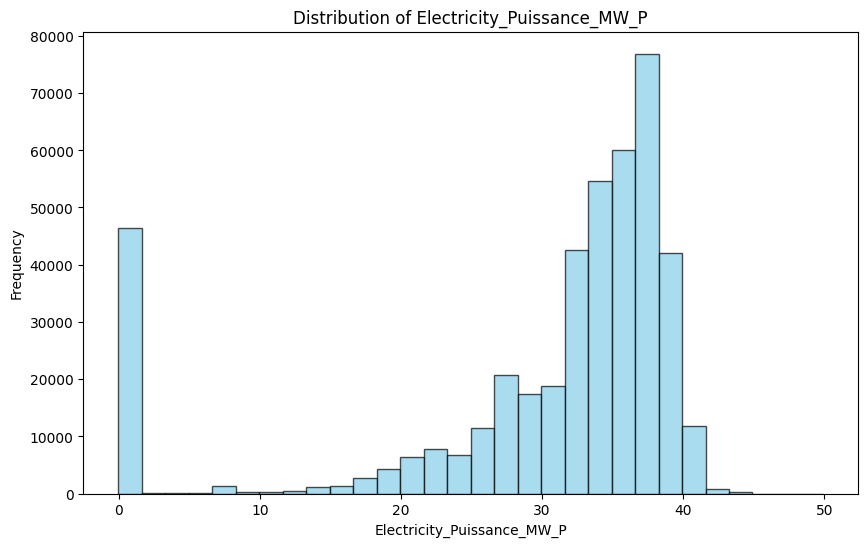

In [130]:
# Plot a histogram of the target variable
plt.figure(figsize=(10, 6))
plt.hist(Y, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Electricity_Puissance_MW_P')
plt.ylabel('Frequency')
plt.title('Distribution of Electricity_Puissance_MW_P')
plt.show()


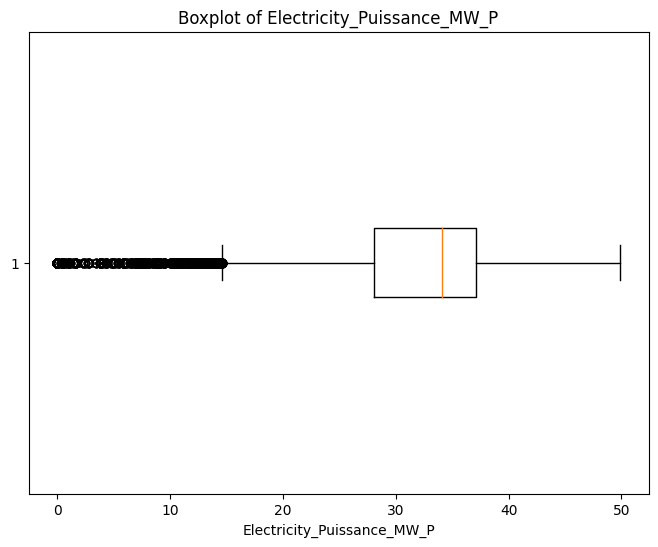

In [132]:
# Plot a boxplot of the target variable
plt.figure(figsize=(8, 6))
plt.boxplot(Y, vert=False)
plt.xlabel('Electricity_Puissance_MW_P')
plt.title('Boxplot of Electricity_Puissance_MW_P')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_3796\3290796423.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Y, shade=True, color='skyblue')


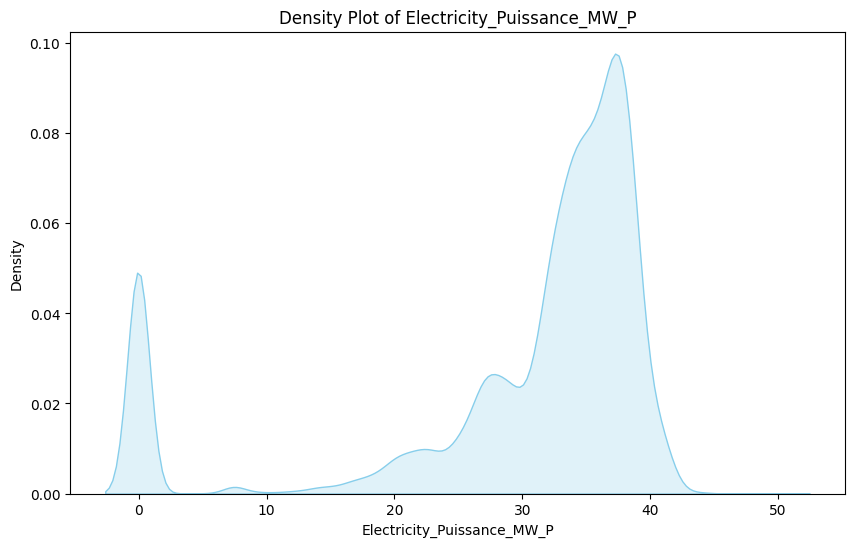

In [133]:
# KDE plot of the target variable
plt.figure(figsize=(10, 6))
sns.kdeplot(Y, shade=True, color='skyblue')
plt.xlabel('Electricity_Puissance_MW_P')
plt.ylabel('Density')
plt.title('Density Plot of Electricity_Puissance_MW_P')
plt.show()

